# Solving the Graph Isomorphism Problem with a Quantum Annealer

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time
import networkx as nx

## 初步准备

定义Pauli矩阵、恒同矩阵

In [ ]:
sigma_i = np.array([[1, 0], [0, 1]], dtype=complex)
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
I = np.identity(2)

定义两个待测图的邻接矩阵A1、A2

In [ ]:
# 样例1

# 图1
# A1 = np.array([[0, 1, 0, 0, 1],
#                [1, 0, 1, 0, 0],
#                [0, 1, 0, 1, 0],
#                [0, 0, 1, 0, 1],
#                [1, 0, 0, 1, 0]], dtype = complex)

# 图2（同构）
# A2 = np.array([[0, 0, 1, 1, 0],
#                [0, 0, 0, 1, 1],
#                [1, 0, 0, 0, 1],
#                [1, 1, 0, 0, 0],
#                [0, 1, 1, 0, 0]], dtype = complex)

# 图2（不同构）
# A2 = np.array([[0, 0, 1, 0, 1],
#                [0, 0, 0, 1, 1],
#                [1, 0, 0, 0, 1],
#                [1, 1, 0, 0, 0],
#                [0, 1, 1, 0, 0]], dtype = complex)



# 样例2

A1 = np.array([[0, 1, 0, 0, 0, 0, 0, 0, 1],
               [1, 0, 0, 0, 0, 0, 0, 0, 1],
               [0, 0, 0, 1, 0, 0, 0, 0, 1],
               [0, 0, 1, 0, 0, 0, 0, 0, 1],
               [0, 0, 0, 0, 0, 1, 0, 0, 1],
               [0, 0, 0, 0, 1, 0, 0, 0, 1],
               [0, 0, 0, 0, 0, 0, 0, 1, 1],
               [0, 0, 0, 0, 0, 0, 1, 0, 1],
               [1, 1, 1, 1, 1, 1, 1, 1, 0]], dtype=complex)

A2 = np.array([[0, 1, 1, 1, 1, 0, 0, 0, 0],
               [1, 0, 1, 0, 0, 1, 1, 0, 0],
               [1, 1, 0, 0, 0, 0, 0, 1, 1],
               [1, 0, 0, 0, 1, 1, 0, 1, 0],
               [1, 0, 0, 1, 0, 0, 1, 0, 1],
               [0, 1, 0, 1, 0, 0, 1, 1, 0],
               [0, 1, 0, 0, 1, 1, 0, 0, 1],
               [0, 0, 1, 1, 0, 1, 0, 0, 1],
               [0, 0, 1, 0, 1, 0, 1, 1, 0]], dtype=complex)

# 样例3

# dim=16, degree=6, lambda=2, mu=2
# TOTAL NUMBER OF STRONGLY REGULAR GRAPHS = 2
# http://www.maths.gla.ac.uk/~es/SRGs/16-6-2-2

# A1 = np.array([
# [0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
# [1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
# [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
# [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
# [1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0],
# [1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0],
# [1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1],
# [0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
# [0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0],
# [0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1],
# [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0],
# [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0],
# [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1],
# [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1],
# [0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1],
# [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0]
# ], dtype = complex)

# A2 = np.array([
# [0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
# [1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
# [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0],
# [1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0],
# [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0],
# [1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1],
# [1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1],
# [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0],
# [0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1],
# [0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1],
# [0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1],
# [0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1],
# [0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0],
# [0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0],
# [0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0],
# [0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0]
# ], dtype = complex)


In [ ]:
def generate_graph():
    G1, G2 = nx.Graph(), nx.Graph()
    for i in range(len(A1)):
        for j in range(len(A1)):
            G1.add_edge(i, j)
            G2.add_edge(i, j)
    nx.draw(G1)
    plt.show()
    nx.draw(G2)
    plt.show()

generate_graph()

定义后续运算所需的函数：计算Pauli-Spin的函数、进行向量单位化的函数

In [ ]:
def pauliZ_spin(k, N):  # 计算第k项为pauli-z，其他N-1项为I的张量积
    pauliZ_spin_matrix = sigma_z if k == 0 else I
    for i in range(N - 1):
        pauliZ_spin_matrix = np.kron(pauliZ_spin_matrix, sigma_z) if i + 1 == k \
            else np.kron(pauliZ_spin_matrix, I)
    return pauliZ_spin_matrix


# 向量归一化
def uniform(state):
    s = 0
    for i in state:
        s += abs(i) ** 2
    for i in range(len(state)):
        state[i] /= np.sqrt(s)
    return state

## 建构哈密顿算子

建构满足绝热量子演化$H(G) = (1 - s)H_0 + sH_p(G)$的初态哈密顿算子$H_0$、问题哈密顿算子$H_p(G)$

In [ ]:
def generate_H0(N):  # 容易制备和求解本征态的哈密顿量H0
    H0 = np.zeros(2 ** N)
    for i in range(N):
        tmp = sigma_x
        for j in range(i):
            tmp = np.kron(I, tmp)
        for j in range(N-i-1):
            tmp = np.kron(tmp, I)
        # print("tmp=", tmp)
        H0 = H0 + tmp
    H0 /= 2
    print("H0 =", H0)
    return H0


def generate_HP(A):  # 目标哈密顿量（要求该哈密顿量的本征态）
    N =  len(A)
    HP = np.zeros(2 ** N)
    for i in range(N):
        for j in range(i+1, N):
            if A[i][j] == 1:
                tmp = sigma_z
                for k in range(i):
                    tmp = np.kron(I, tmp)
                for k in range(j - i - 1):
                    tmp = np.kron(tmp, I)
                tmp = np.kron(tmp, sigma_z)
                for k in range(N - j - 1):
                    tmp = np.kron(tmp, I)
                # print("tmp=", tmp)
                HP = HP + tmp
    print("HP =", HP)
    return HP

In [ ]:
H0 = generate_H0(len(A1))

In [ ]:
H0_eigen = np.linalg.eig(H0)  # 耗时间，只计算一次

In [ ]:
HP_1 = generate_HP(A1)

In [ ]:
HP_2 = generate_HP(A2)

## 执行绝热量子演化

令$s = \frac{t}{T}$，$t$从$0$开始每次循环增加$\frac{1}{steps}$，循环共执行$steps$次，以此模拟$s$由$0$逼近$1$的演化过程

In [ ]:
def annealing_solver(steps, H0, H1):
    print(f'\nenter solver, total {steps} steps')
    
    t = 0
    eg_vector1 = np.abs(H0_eigen[1][0])
    eg_value1 = H0_eigen[0][0]
    energy1 = [eg_value1]
    Ht = H0   # 初始哈密顿量
    h = 6.62607015e-34   # 普朗克常量
    
    def expectation_value(A, psi):  # 求A在状态psi下的期望值
        norm_psi = psi / np.linalg.norm(psi)  # 单位化psi
        expectation  = np.inner(np.conj(norm_psi).T, np.matmul(A, norm_psi) )  # Calculate <norm_psi|A|norm_psi> 
        return expectation

    Q2 = []  # 无初始Q2
    def generate_Q2(psi):  # spin-glass order parameter
        # 计算 sigma { <pauli-z(i), pauli-z(j)> ^ 2 } (i != j)
        N = int(np.log2(len(H0)))
        sum = 0
        for i in range(N):
            for j in range(N):
                if i == j:
                    continue
                sum = sum + expectation_value((pauliZ_spin(i, N) * pauliZ_spin(j, N)), psi) ** 2
        
        sum = sum / (N * (N - 1))
        return np.sqrt(sum)

    Mx = []  # 无初始Mx
    
    for s in range(steps):
        start_loop = time.time()

        t += 1 / steps
        eg_vector_tmp1 = uniform(np.dot(Ht, eg_vector1) * (-1j) * (math.pi * 2 / steps) / h + eg_vector1)
        Ht = (1 - t) * H0 + t * H1  # 哈密顿量

        eg_value1 = np.abs(eg_vector_tmp1[0]) * eg_value1 / np.abs(eg_vector1[0])  # E = <H(G)>
        spin_glass = generate_Q2(eg_vector_tmp1) # 计算Q2
        x_magnetization = 2 * expectation_value(H0, eg_vector_tmp1) # 计算Mx

        eg_vector1 = eg_vector_tmp1  # 更新状态phi
        uniform(eg_vector1)

        energy1.append(eg_value1)
        Q2.append(spin_glass)
        Mx.append(x_magnetization)
        
        print(f'step {s + 1} finished in {time.time() - start_loop} s')

    # print(np.abs(uniform(eg_vector1)))
    # return energy1, uniform(eg_vector1)
    return energy1, Q2, Mx

In [ ]:
energy1, Q2_1, Mx_1 = annealing_solver(100, H0, HP_1)

In [ ]:
energy2, Q2_2, Mx_2 = annealing_solver(100, H0, HP_2)

In [7]:
H0_eigen = np.linalg.eig(H0)  # 耗时间，只计算一次

In [8]:
HP_1 = generate_HP(A1)

HP = [[12.+0.j  0.+0.j  0.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -4.+0.j  0.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  8.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 ...
 [ 0.+0.j  0.+0.j  0.+0.j ...  8.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...  0.+0.j -4.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...  0.+0.j  0.+0.j 12.+0.j]]


In [9]:
HP_2 = generate_HP(A2)

HP = [[18.+0.j  0.+0.j  0.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j 10.+0.j  0.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j 10.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 ...
 [ 0.+0.j  0.+0.j  0.+0.j ... 10.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...  0.+0.j 10.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...  0.+0.j  0.+0.j 18.+0.j]]


## 执行绝热量子演化

令$s = \frac{t}{T}$，$t$从$0$开始每次循环增加$\frac{1}{steps}$，循环共执行$steps$次，以此模拟$s$由$0$逼近$1$的演化过程

In [10]:
def annealing_solver(steps, H0, H1):
    print(f'\nenter solver, total {steps} steps')
    
    t = 0
    eg_vector1 = np.abs(H0_eigen[1][0])
    eg_value1 = H0_eigen[0][0]
    energy1 = [eg_value1]
    Ht = H0   # 初始哈密顿量
    h = 6.62607015e-34   # 普朗克常量
    
    def expectation_value(A, psi):  # 求A在状态psi下的期望值
        norm_psi = psi / np.linalg.norm(psi)  # 单位化psi
        expectation  = np.inner(np.conj(norm_psi).T, np.matmul(A, norm_psi) )  # Calculate <norm_psi|A|norm_psi> 
        return expectation

    Q2 = []  # 无初始Q2
    def generate_Q2(psi):  # spin-glass order parameter
        # 计算 sigma { <pauli-z(i), pauli-z(j)> ^ 2 } (i != j)
        N = int(np.log2(len(H0)))
        sum = 0
        for i in range(N):
            for j in range(N):
                if i == j:
                    continue
                sum = sum + expectation_value((pauliZ_spin(i, N) * pauliZ_spin(j, N)), psi) ** 2
        
        sum = sum / (N * (N - 1))
        return np.sqrt(sum)

    Mx = []  # 无初始Mx
    
    for s in range(steps):
        start_loop = time.time()

        t += 1 / steps
        eg_vector_tmp1 = uniform(np.dot(Ht, eg_vector1) * (-1j) * (math.pi * 2 / steps) / h + eg_vector1)
        Ht = (1 - t) * H0 + t * H1  # 哈密顿量

        eg_value1 = np.abs(eg_vector_tmp1[0]) * eg_value1 / np.abs(eg_vector1[0])  # E = <H(G)>
        spin_glass = generate_Q2(eg_vector_tmp1) # 计算Q2
        x_magnetization = 2 * expectation_value(H0, eg_vector_tmp1) # 计算Mx

        eg_vector1 = eg_vector_tmp1  # 更新状态phi
        uniform(eg_vector1)

        energy1.append(eg_value1)
        Q2.append(spin_glass)
        Mx.append(x_magnetization)
        
        print(f'step {s + 1} finished in {time.time() - start_loop} s')

    # print(np.abs(uniform(eg_vector1)))
    # return energy1, uniform(eg_vector1)
    return energy1, Q2, Mx

In [11]:
energy1, Q2_1, Mx_1 = annealing_solver(100, H0, HP_1)


enter solver, total 100 steps
step 1 finished in 0.8705539703369141 s
step 2 finished in 0.9085390567779541 s
step 3 finished in 0.8843410015106201 s
step 4 finished in 0.8775420188903809 s
step 5 finished in 0.8866701126098633 s
step 6 finished in 0.8897819519042969 s
step 7 finished in 0.8881011009216309 s
step 8 finished in 0.8836019039154053 s
step 9 finished in 0.8786568641662598 s
step 10 finished in 0.8673663139343262 s
step 11 finished in 0.8812510967254639 s
step 12 finished in 0.8838012218475342 s
step 13 finished in 0.8633949756622314 s
step 14 finished in 0.865692138671875 s
step 15 finished in 0.919363260269165 s
step 16 finished in 0.8946897983551025 s
step 17 finished in 0.8383259773254395 s
step 18 finished in 0.8719892501831055 s
step 19 finished in 0.8754589557647705 s
step 20 finished in 0.9006109237670898 s
step 21 finished in 0.8770999908447266 s
step 22 finished in 0.8905353546142578 s
step 23 finished in 0.8406181335449219 s
step 24 finished in 0.853294134140014

In [12]:
energy2, Q2_2, Mx_2 = annealing_solver(100, H0, HP_2)


enter solver, total 100 steps
step 1 finished in 0.8821160793304443 s
step 2 finished in 0.841407060623169 s
step 3 finished in 0.842926025390625 s
step 4 finished in 0.819195032119751 s
step 5 finished in 0.8939609527587891 s
step 6 finished in 0.9377610683441162 s
step 7 finished in 0.885282039642334 s
step 8 finished in 0.8652451038360596 s
step 9 finished in 0.8876650333404541 s
step 10 finished in 0.902595043182373 s
step 11 finished in 0.8727309703826904 s
step 12 finished in 0.8436658382415771 s
step 13 finished in 0.8666930198669434 s
step 14 finished in 0.8754768371582031 s
step 15 finished in 0.9223039150238037 s
step 16 finished in 0.9276480674743652 s
step 17 finished in 0.9081549644470215 s
step 18 finished in 0.9279427528381348 s
step 19 finished in 0.8420989513397217 s
step 20 finished in 0.8732619285583496 s
step 21 finished in 0.868110179901123 s
step 22 finished in 0.8823659420013428 s
step 23 finished in 0.8978550434112549 s
step 24 finished in 0.9044568538665771 s


## 作图展示结果

若energy曲线与Q2曲线均重合，则说明二图同构；反之则二图不同构

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


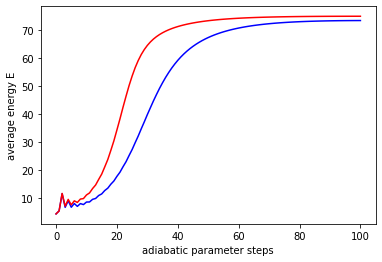

energy1: (73.3418437052696+0j)
energy2: (74.87244359373983+0j)


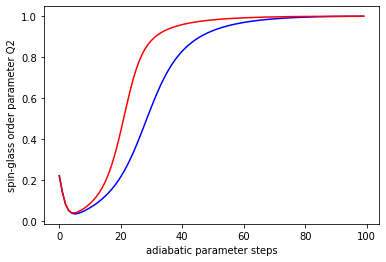

Q2_1: (0.9999443651063884+0j)
Q2_2: (0.9999914942323809+0j)


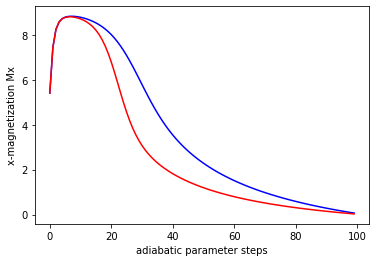

Mx_1: (0.9999443651063884+0j)
Mx_2: (0.9999914942323809+0j)


In [13]:
plt.figure()
plt.plot(energy1, c = 'blue')
plt.plot(energy2, c = 'red')
plt.xlabel('adiabatic parameter steps')
plt.ylabel('average energy E')
plt.show()
print('energy1:', energy1[len(energy1) - 1])
print('energy2:', energy2[len(energy2) - 1])

plt.plot(Q2_1, c = 'blue')
plt.plot(Q2_2, c = 'red')
plt.xlabel('adiabatic parameter steps')
plt.ylabel('spin-glass order parameter Q2')
plt.show()
print('Q2_1:', Q2_1[len(Q2_1) - 1])
print('Q2_2:', Q2_2[len(Q2_2) - 1])

plt.plot(Mx_1, c = 'blue')
plt.plot(Mx_2, c = 'red')
plt.xlabel('adiabatic parameter steps')
plt.ylabel('x-magnetization Mx')
plt.show()
print('Mx_1:', Q2_1[len(Mx_1) - 1])
print('Mx_2:', Q2_2[len(Mx_2) - 1])